# Healthcare

DESCRIPTION

### Problem Statement
<ul>
    <li>NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
     <li>The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
     <li>Build a model to accurately predict whether the patients in the dataset have diabetes or not.
</ul>

### Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

<table>
    <th>Variables</th><th>Description</th>
    <tr><td>Pregnancies</td><td>Number of times pregnant</td></tr>
    <tr><td>Glucose</td><td>Plasma glucose concentration in an oral glucose tolerance test</td></tr>
    <tr><td>BloodPressure</td><td>Diastolic blood pressure (mm Hg)</td></tr>
    <tr><td>SkinThickness</td><td>Triceps skinfold thickness (mm)</td></tr>
    <tr><td>Insulin</td><td>Two hour serum insulin</td></tr>
    <tr><td>BMI</td><td>Body Mass Index</td></tr>
    <tr><td>DiabetesPedigreeFunction</td><td>Diabetes pedigree function</td></tr>
    <tr><td>Age</td><td>Age in years</td></tr>
    <tr><td>Outcome</td><td>Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0</td></tr>
</table>

### Project Task: Week 1

#### Data Exploration:

<ol>
    <li> Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
    <ul>
        <li> Glucose
        <li> BloodPressure
        <li> SkinThickness
        <li> Insulin
        <li> BMI
    </ul>
    <li> Visually explore these variables using histograms. Treat the missing values accordingly.
    <li> There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the csv file
data = pd.read_csv('health care diabetes.csv')

In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
def plot_histogram(list):
    '''
    This function will plot the Histograms for the Input variables 
    '''
    plt.figure(figsize=(17,18))
    
    for i in range(len(list)):
        plt.subplot(3,2,i+1)
        ax = sns.histplot(data=data, x= list[i], hue='Outcome', multiple='stack', hue_order=[1,0], kde=True)
        plt.title('Histogram for {}'.format(list[i]))
    
    plt.show()

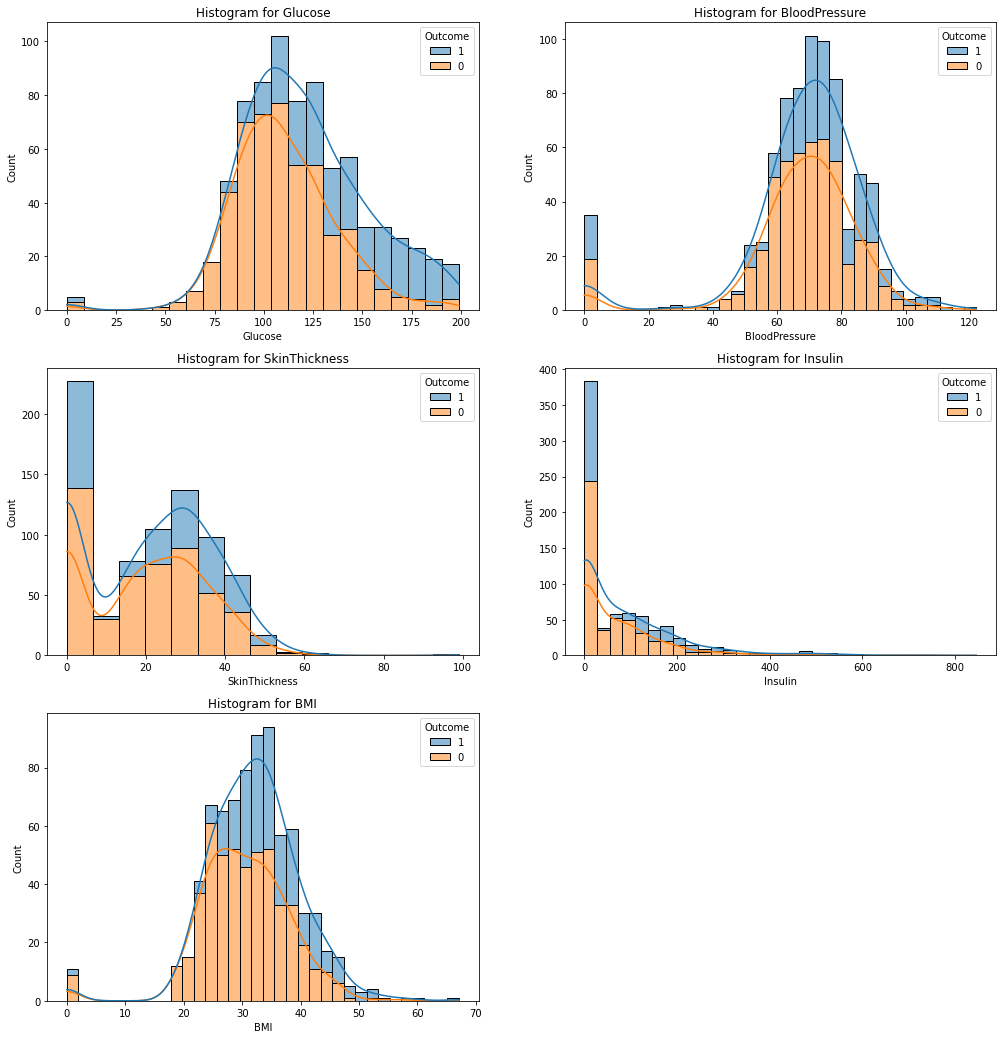

In [7]:
#Provide the list of Histograms we need to print
list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

plot_histogram(list)

__Observation :__ In the above diagrams it looks like for Skin Thickness and Insulin some of the measurements which are displayed as '0' are not recorded only and imputing them either with mean, median, mode will not give us accurate results. So imputing all the missing values (0) in above case with KNN Imputer. 

In [8]:
#Impute the data using KNNImputer
from sklearn.impute import KNNImputer

df_impute = data.drop("Outcome",axis=1)
col_names = df_impute.columns
impute_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = KNNImputer(missing_values=0, n_neighbors = 7)
df_impute[col_names] = pd.DataFrame(imputer.fit_transform(df_impute))

#Datatype of below columns is getting changed to float, retain the same
retain_type_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
df_impute[retain_type_columns] = df_impute[retain_type_columns].astype(np.int64)

#recreate the data frame to its using imputed values and retained datatypes.
data = pd.concat((data.Pregnancies, df_impute.Glucose, df_impute.BloodPressure, df_impute.SkinThickness, df_impute.Insulin,
                  df_impute.BMI, data.DiabetesPedigreeFunction, data.Age, data.Outcome), axis=1)

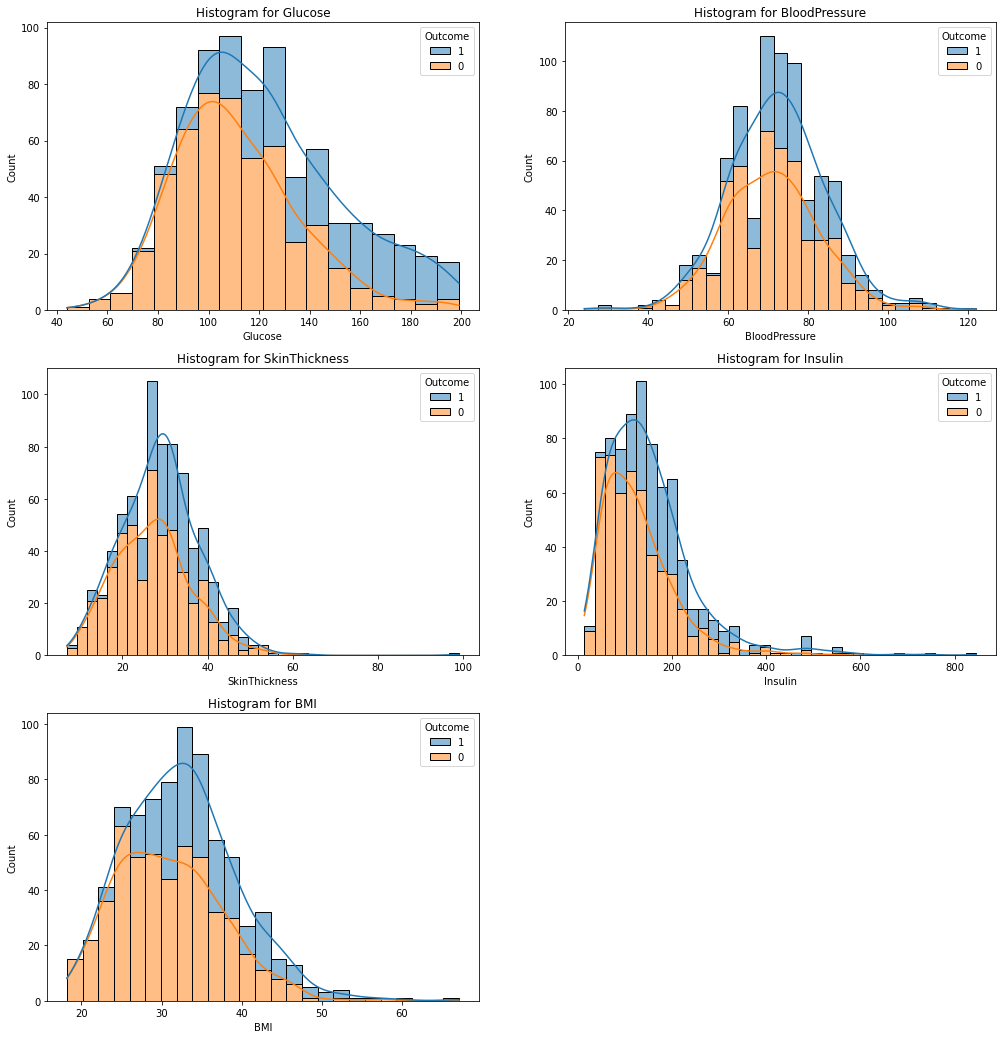

In [9]:
#Plot the Histogram of the above list to verify whether the values are imputed properly
plot_histogram(list)

In [10]:
#Check that the datatypes are also retained
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


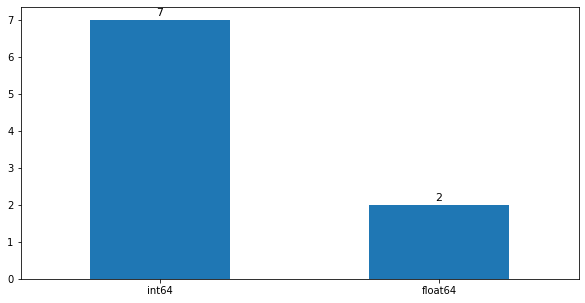

In [11]:
#Plot the count (frequency) plot describing the data types and the count of variables
plt.figure(figsize=(10,5))
ax = data.dtypes.value_counts().plot(kind="bar")
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+0.1,rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.xticks(rotation=0)
plt.show()

#### Data Exploration:

<ol start="4">
    <li> Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
    <li> Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
    <li> Perform correlation analysis. Visually explore it using a heat map.


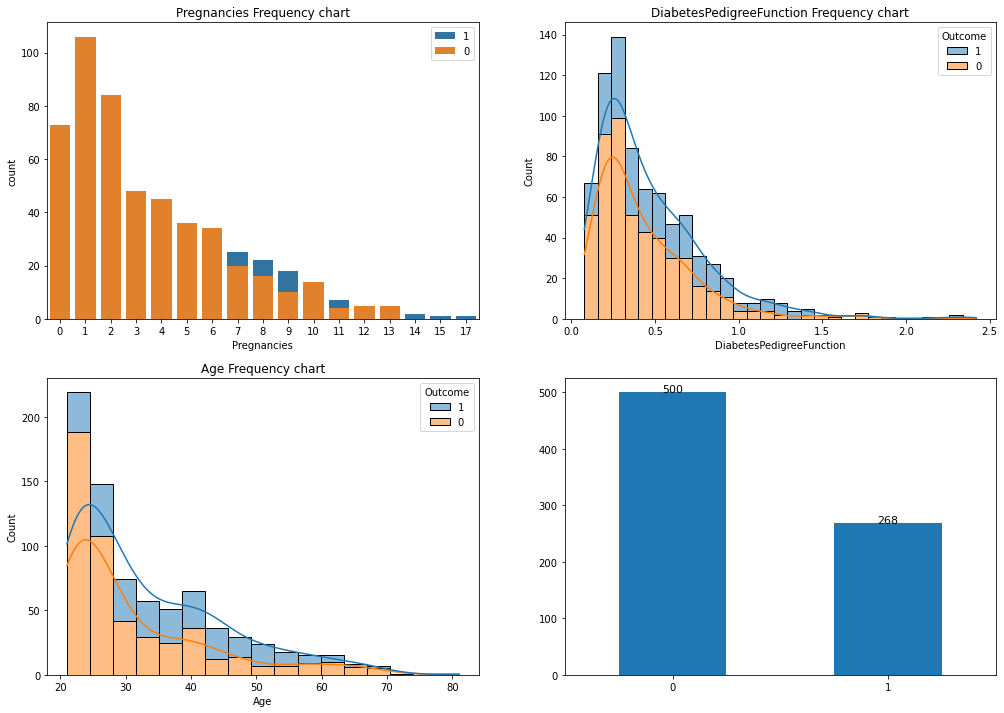

In [12]:
plt.figure(figsize=(17,12))
plt.subplot(2,2,1)
ax = sns.countplot(x="Pregnancies", data=data, hue='Outcome', dodge=False, hue_order=[1,0])
ax.legend(loc=1)
plt.title('Pregnancies Frequency chart')

plt.subplot(2,2,2)
ax = sns.histplot(data=data, x= 'DiabetesPedigreeFunction', hue='Outcome', multiple='stack', hue_order=[1,0], kde=True)
plt.title('DiabetesPedigreeFunction Frequency chart')

plt.subplot(2,2,3)
ax = sns.histplot(data=data, x= 'Age', hue='Outcome', multiple='stack', hue_order=[1,0], kde=True)
plt.title('Age Frequency chart')

plt.subplot(2,2,4)
ax = data.Outcome.value_counts().plot(kind="bar")
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+1.0,rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.xticks(rotation=0)
plt.show()

__Observation :__ Pregnancies does not seems to be good predictor of Outcome.<br>
Outcome is Imbalanced class

In [13]:
def scatter_plot(n_rows, n_cols, x, y_list):
    '''
    This function will plot the scatter plot against the X and provided list of y variables
    '''
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4.5, n_rows * 5), sharex=True)
    
    fig.suptitle('Relationship of {} with co-variables'.format(x))
    
    for i in range(len(y_list)):
        #get the rows and column for the axes
        row = i // n_cols
        col = i % n_cols
        
        #Incase if the number of rows provided are 1 then the axes will be 1 dimensional only otherwise axes will be 2D
        if n_rows == 1:
            sns.scatterplot(ax=axes[col], data=data, x=x, y=y_list[i], hue='Outcome')
        else:
            sns.scatterplot(ax=axes[row,col], data=data, x=x, y=y_list[i], hue='Outcome')
    
    #Increment the row axis if the loop ends on the last column
    if col == n_cols - 1:
        row = row + 1
        col = 0
    else:
        col = col + 1
    
    #This is same logic which is applied on top to identify if axes is 1D or 2D
    if n_rows == 1:
        sns.scatterplot(ax=axes[col], data=data, x=x, y='Outcome')
    else:
        sns.scatterplot(ax=axes[row,col], data=data, x=x, y='Outcome')
        
    plt.show()       

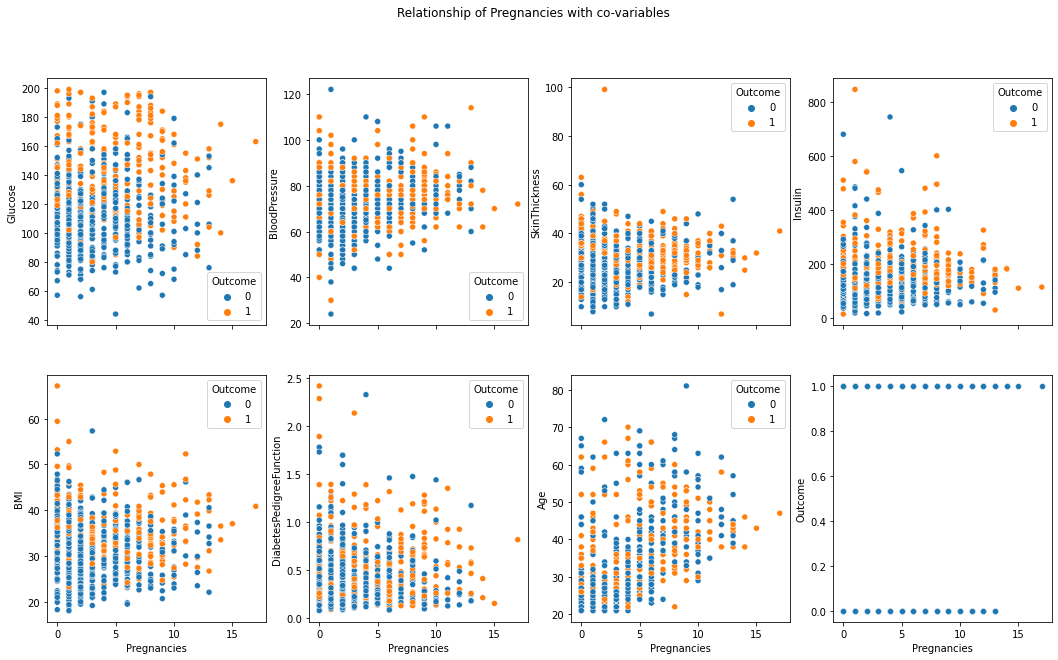

In [14]:
y_list=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scatter_plot(n_rows=2, n_cols=4, x='Pregnancies', y_list=y_list)

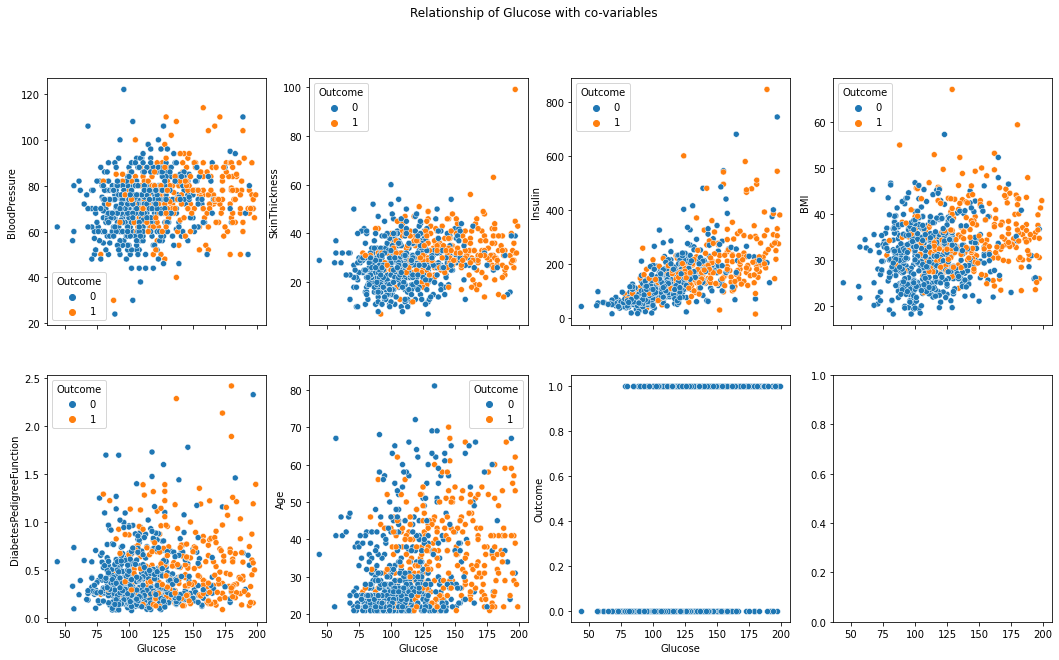

In [15]:
y_list=['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scatter_plot(n_rows=2, n_cols=4, x='Glucose', y_list=y_list)

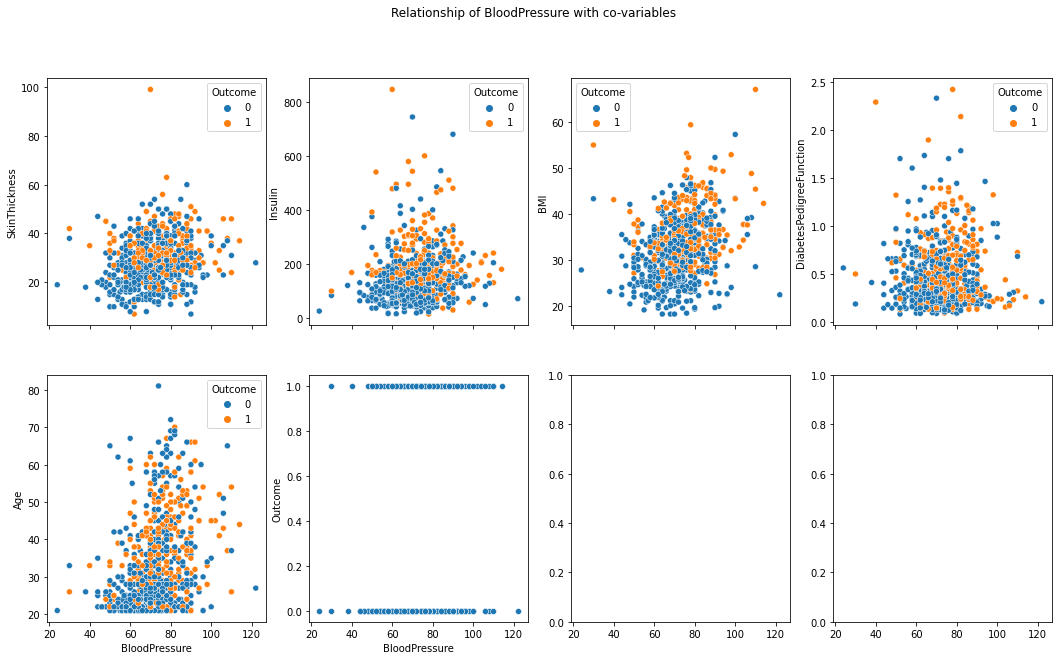

In [16]:
y_list=['SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scatter_plot(n_rows=2, n_cols=4, x='BloodPressure', y_list=y_list)

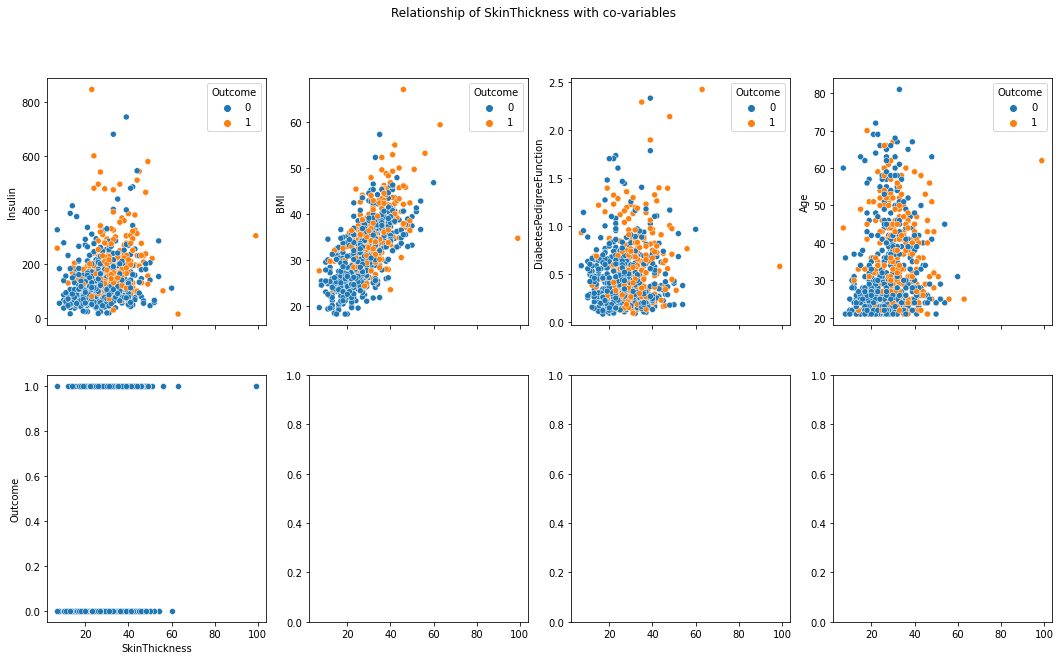

In [17]:
y_list=['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scatter_plot(n_rows=2, n_cols=4, x='SkinThickness', y_list=y_list)

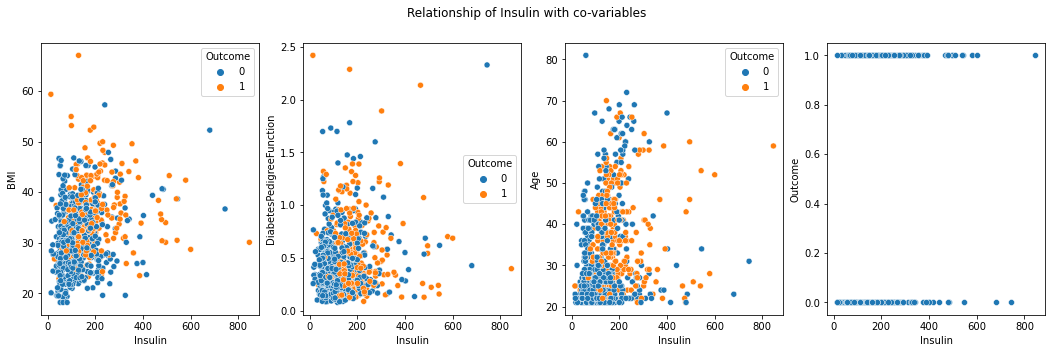

In [18]:
y_list=['BMI', 'DiabetesPedigreeFunction', 'Age']
scatter_plot(n_rows=1, n_cols=4, x='Insulin', y_list=y_list)

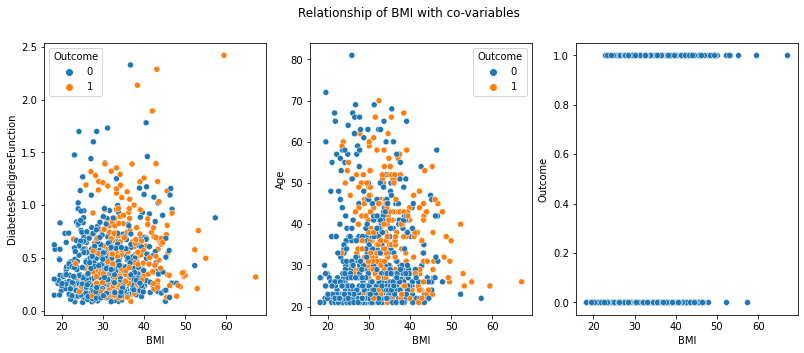

In [19]:
y_list=['DiabetesPedigreeFunction', 'Age']
scatter_plot(n_rows=1, n_cols=3, x='BMI', y_list=y_list)

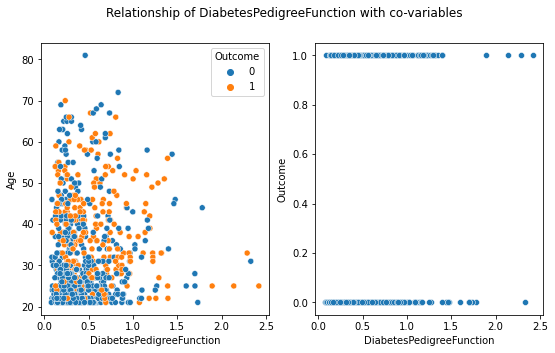

In [20]:
y_list=['Age']
scatter_plot(n_rows=1, n_cols=2, x='DiabetesPedigreeFunction', y_list=y_list)

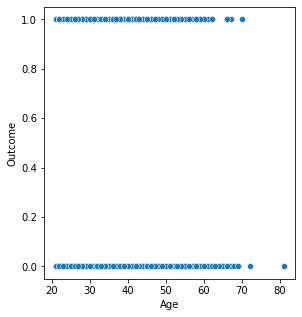

In [21]:
plt.figure(figsize=(4.5,5))
sns.scatterplot(data=data, x='Age', y='Outcome')
plt.show()

__Observation :__ There doesn't seems to be good co-relation between any of the variables.

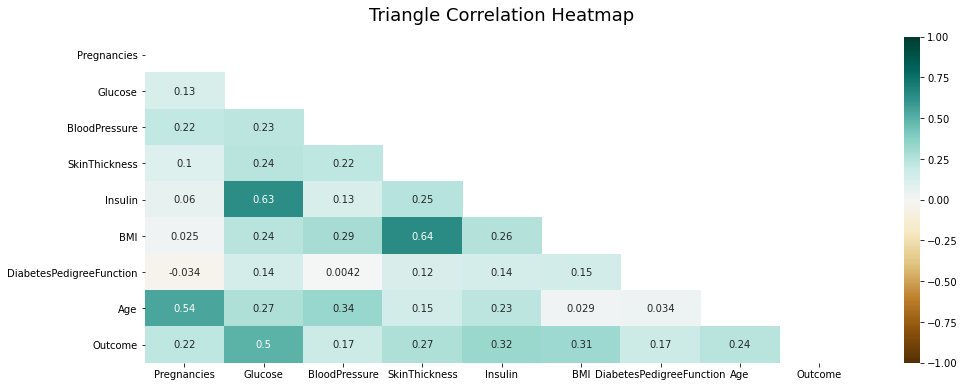

In [22]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Project Task: Week 2

Data Modeling:

<ol>
    <li> Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
    <li> Apply an appropriate classification algorithm to build a model.
    <li> Compare various models with the results from KNN algorithm.
    <li> Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.
</ol>
Please be descriptive to explain what values of these parameter you have used.

__Strategy used :__ Since the outcome variable is categorical having only 2 values we will try classification models.<br>
The sample data has only 768 rows which needs, which we will split in train and test parts. Since we will require more data to train the models we will go with 20% for the test data.<br>
We will also scale the data with Standard scaler to scale all the values.

In [23]:
#We will split the data into train and test
from sklearn.model_selection import train_test_split
features = data.drop("Outcome", axis=1).values
label = data.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42, stratify=label)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [26]:
def auc_roc():
    '''
    #Preparing ROC Curve (Receiver Operating Characteristics Curve)
    '''

    # predict probabilities
    probs = classifier.predict_proba(X_train)

    # keep probabilities for the positive outcome only
    probs = probs[:, 1]

    # calculate AUC
    auc = roc_auc_score(y_train, probs)
    print('AUC: %.3f' % auc)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_train, probs)

    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')

cross_val_score = 0.7851 score = 0.6948 

 Confusion Matrix : 
 [[80 20]
 [27 27]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

AUC: 0.851


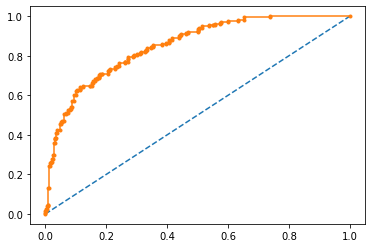

In [27]:
#Import all the Classifiers here
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs', max_iter=200, C=3.7276, tol=1.0000)

classifier.fit(X_train, y_train)
c_val_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy"))
score = classifier.score(X_test, y_test)
print("cross_val_score = {:.4f} score = {:.4f} ".format(c_val_score, score))

# Predict the labels of the test data: y_pred
y_pred = classifier.predict(X_test)

# Generate the confusion matrix and classification report
print("\n Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n Classification Report : \n", classification_report(y_test, y_pred))

auc_roc()

cross_val_score = 0.7753 score = 0.7208 

 Confusion Matrix : 
 [[84 16]
 [27 27]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154

AUC: 0.848


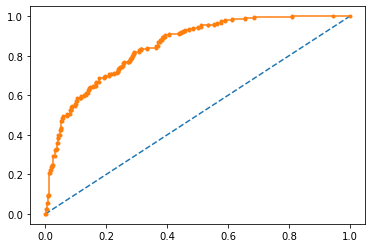

In [28]:
#Import all the Classifiers here
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='modified_huber', alpha=1.0)
classifier.fit(X_train, y_train)
c_val_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy"))
score = classifier.score(X_test, y_test)
print("cross_val_score = {:.4f} score = {:.4f} ".format(c_val_score, score))

# Predict the labels of the test data: y_pred
y_pred = classifier.predict(X_test)

# Generate the confusion matrix and classification report
print("\n Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n Classification Report : \n", classification_report(y_test, y_pred))

auc_roc()

cross_val_score = 0.7786 score = 0.7143 

 Confusion Matrix : 
 [[84 16]
 [28 26]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       100
           1       0.62      0.48      0.54        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

AUC: 0.850


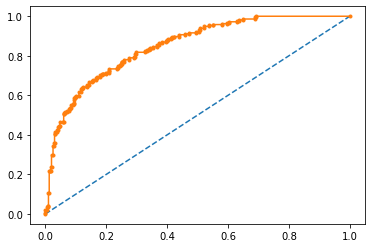

In [29]:
#Import all the Classifiers here
from sklearn import svm

classifier = svm.SVC(kernel='linear', probability=True)
classifier.fit(X_train, y_train)
c_val_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy"))
score = classifier.score(X_test, y_test)
print("cross_val_score = {:.4f} score = {:.4f} ".format(c_val_score, score))

# Predict the labels of the test data: y_pred
y_pred = classifier.predict(X_test)

# Generate the confusion matrix and classification report
print("\n Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n Classification Report : \n", classification_report(y_test, y_pred))

auc_roc()

cross_val_score = 0.7688 score = 0.6818 

 Confusion Matrix : 
 [[82 18]
 [31 23]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       100
           1       0.56      0.43      0.48        54

    accuracy                           0.68       154
   macro avg       0.64      0.62      0.63       154
weighted avg       0.67      0.68      0.67       154

AUC: 0.855


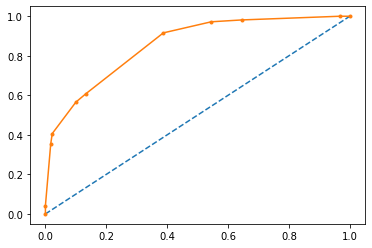

In [30]:
#Import all the Classifiers here
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto', max_leaf_nodes=13,
                                    min_samples_split=9, random_state=42)
classifier.fit(X_train, y_train)
c_val_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy"))
score = classifier.score(X_test, y_test)
print("cross_val_score = {:.4f} score = {:.4f} ".format(c_val_score, score))

# Predict the labels of the test data: y_pred
y_pred = classifier.predict(X_test)

# Generate the confusion matrix and classification report
print("\n Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n Classification Report : \n", classification_report(y_test, y_pred))

auc_roc()

cross_val_score = 0.7818 score = 0.7208 

 Confusion Matrix : 
 [[84 16]
 [27 27]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154

AUC: 0.915


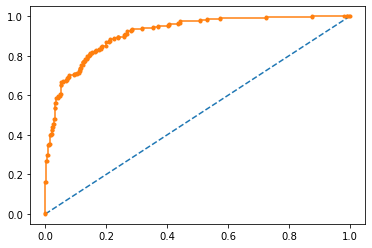

In [31]:
#Import all the Classifiers here
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42, max_depth=7, max_leaf_nodes=12, min_samples_split=11)
classifier.fit(X_train, y_train)
c_val_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy"))
score = classifier.score(X_test, y_test)
print("cross_val_score = {:.4f} score = {:.4f} ".format(c_val_score, score))

# Predict the labels of the test data: y_pred
y_pred = classifier.predict(X_test)

# Generate the confusion matrix and classification report
print("\n Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n Classification Report : \n", classification_report(y_test, y_pred))

auc_roc()

cross_val_score = 0.7655 score = 0.7143 

 Confusion Matrix : 
 [[80 20]
 [24 30]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.60      0.56      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

AUC: 0.902


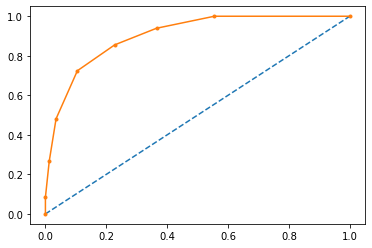

In [32]:
#Import all the Classifiers here
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
c_val_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy"))
score = classifier.score(X_test, y_test)
print("cross_val_score = {:.4f} score = {:.4f} ".format(c_val_score, score))

# Predict the labels of the test data: y_pred
y_pred = classifier.predict(X_test)

# Generate the confusion matrix and classification report
print("\n Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n Classification Report : \n", classification_report(y_test, y_pred))

auc_roc()

In [33]:
classifiers = {
    "Logistic Regression    " : LogisticRegression(solver='lbfgs', max_iter=200, C=3.7276, tol=1.0000),
    "KNeighborsClassifier   " : KNeighborsClassifier(n_neighbors = 7),
    "SGDClassifier          " : SGDClassifier(loss='modified_huber', alpha=1.0),
    "SVM                    " : svm.SVC(kernel='linear', probability=True),
    "Decision Tree          " : DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto', max_leaf_nodes=13,
                                                       min_samples_split=9, random_state=42),
    "Random Forest          " : RandomForestClassifier(random_state=42, max_depth=7, max_leaf_nodes=12, min_samples_split=11)
}

In [34]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    c_val_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=5))
    score = classifier.score(X_test, y_test)
    print("{:<15} | cross_val_score = {:.4f} score = {:.4f}".format(name, c_val_score, score))

Logistic Regression     | cross_val_score = 0.7851 score = 0.6948
KNeighborsClassifier    | cross_val_score = 0.7655 score = 0.7143
SGDClassifier           | cross_val_score = 0.7753 score = 0.7208
SVM                     | cross_val_score = 0.7786 score = 0.7143
Decision Tree           | cross_val_score = 0.7688 score = 0.6818
Random Forest           | cross_val_score = 0.7818 score = 0.7208


__Conclusion :__ Random Forest seems to be a best model among the above.

#### Data Reporting:

<ol start="5">
    <li> Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
        <ul>
            <li> Pie chart to describe the diabetic or non-diabetic population
            <li> Scatter charts between relevant variables to analyze the relationships
            <li> Histogram or frequency charts to analyze the distribution of the data
            <li> Heatmap of correlation analysis among the relevant variables
            <li> Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.


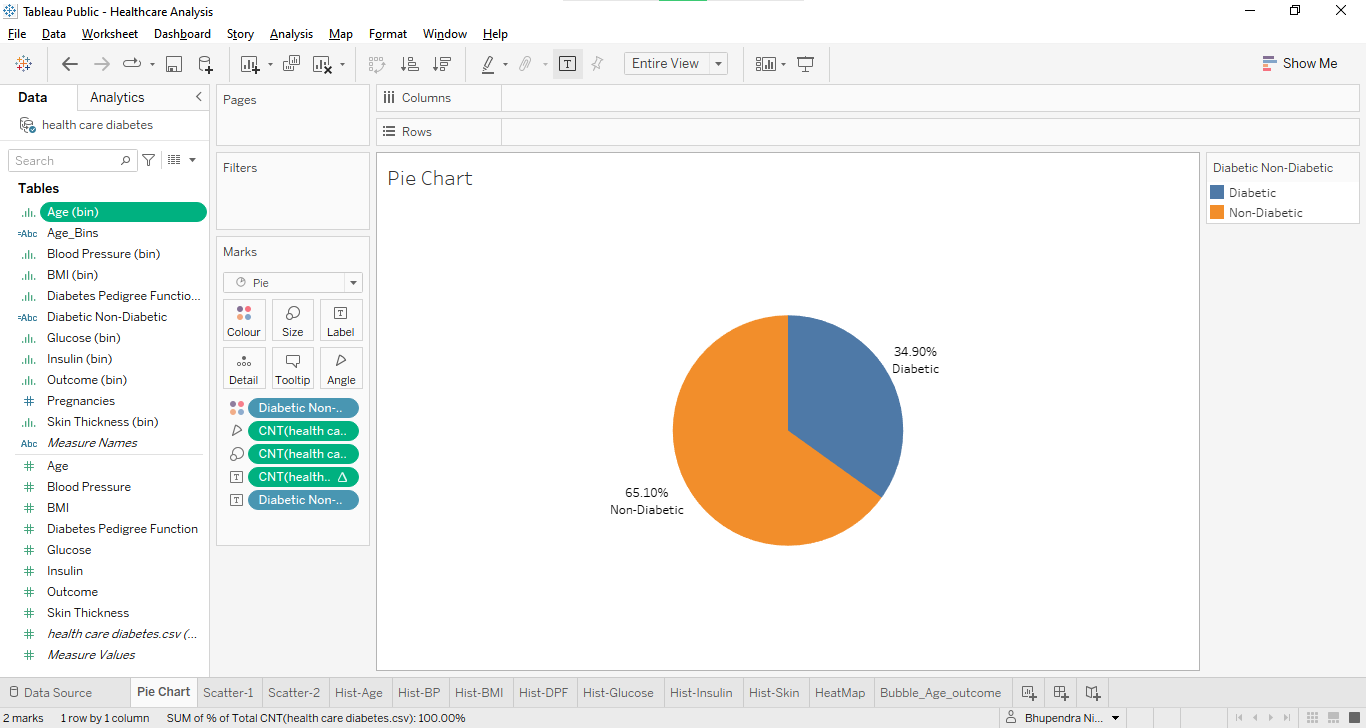

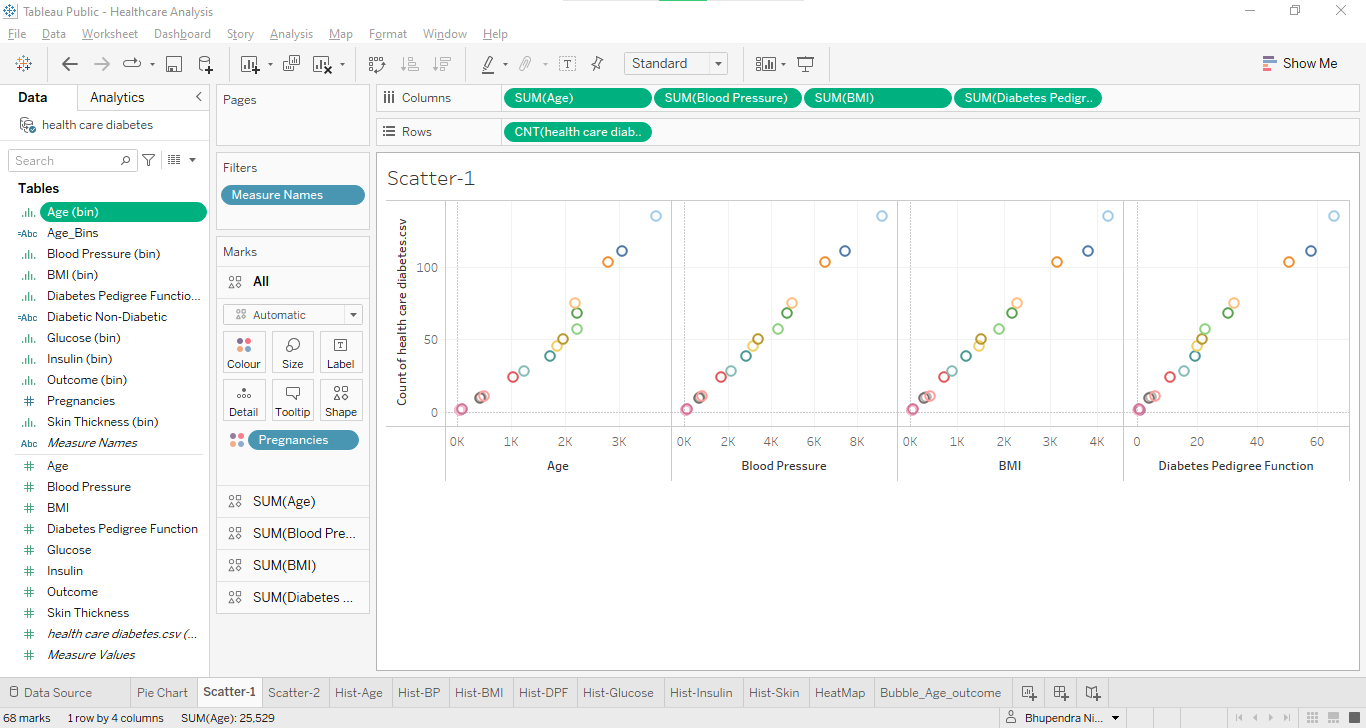

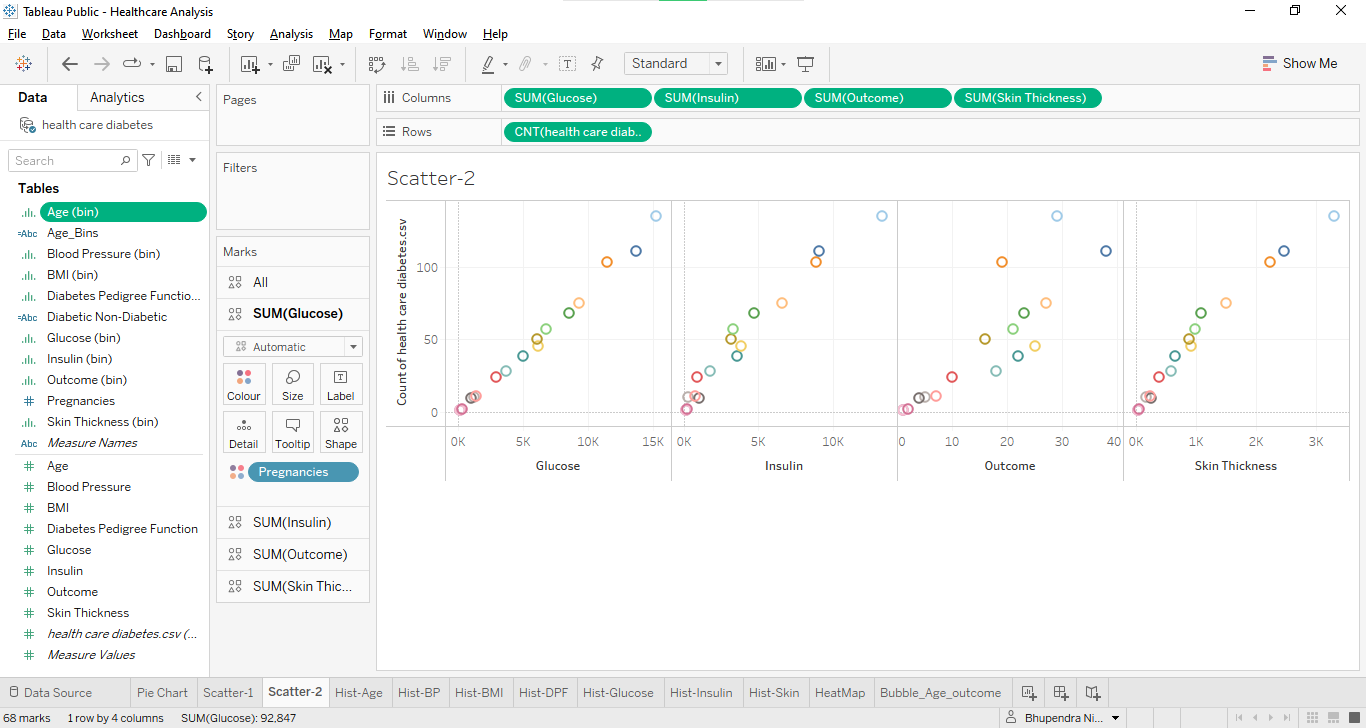

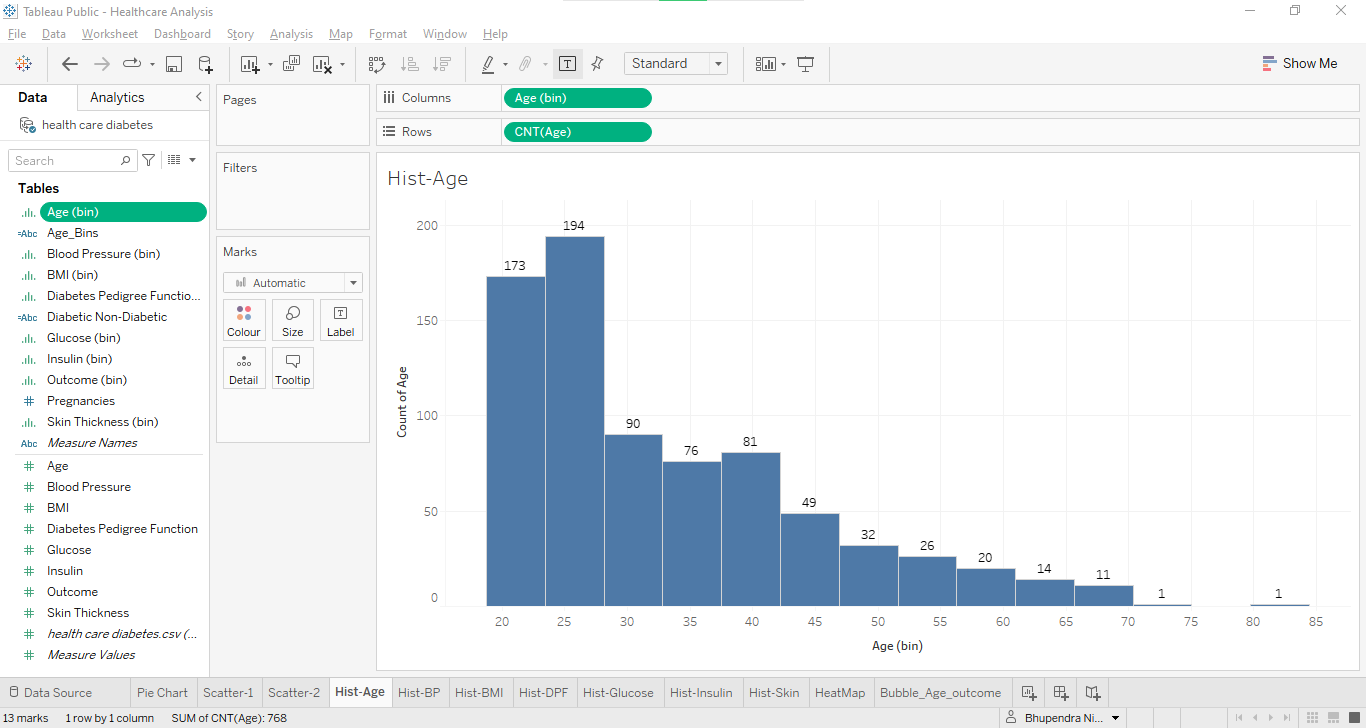

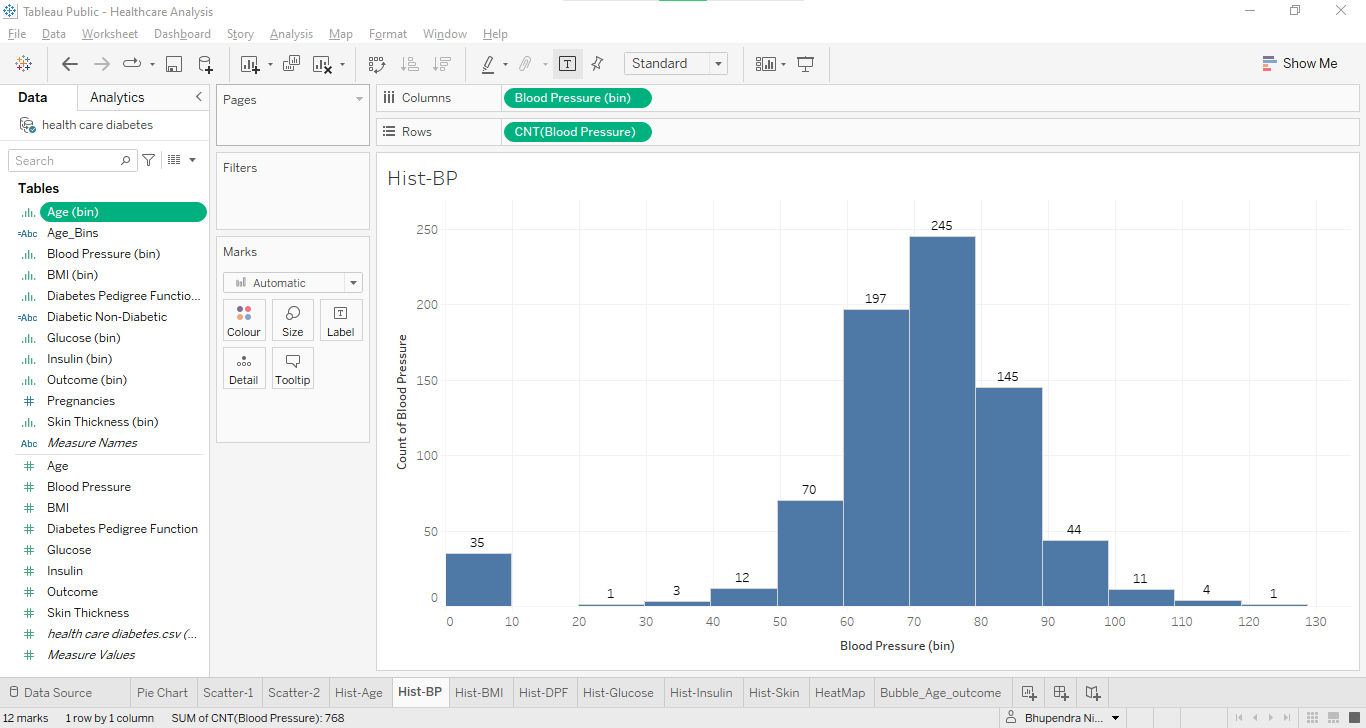

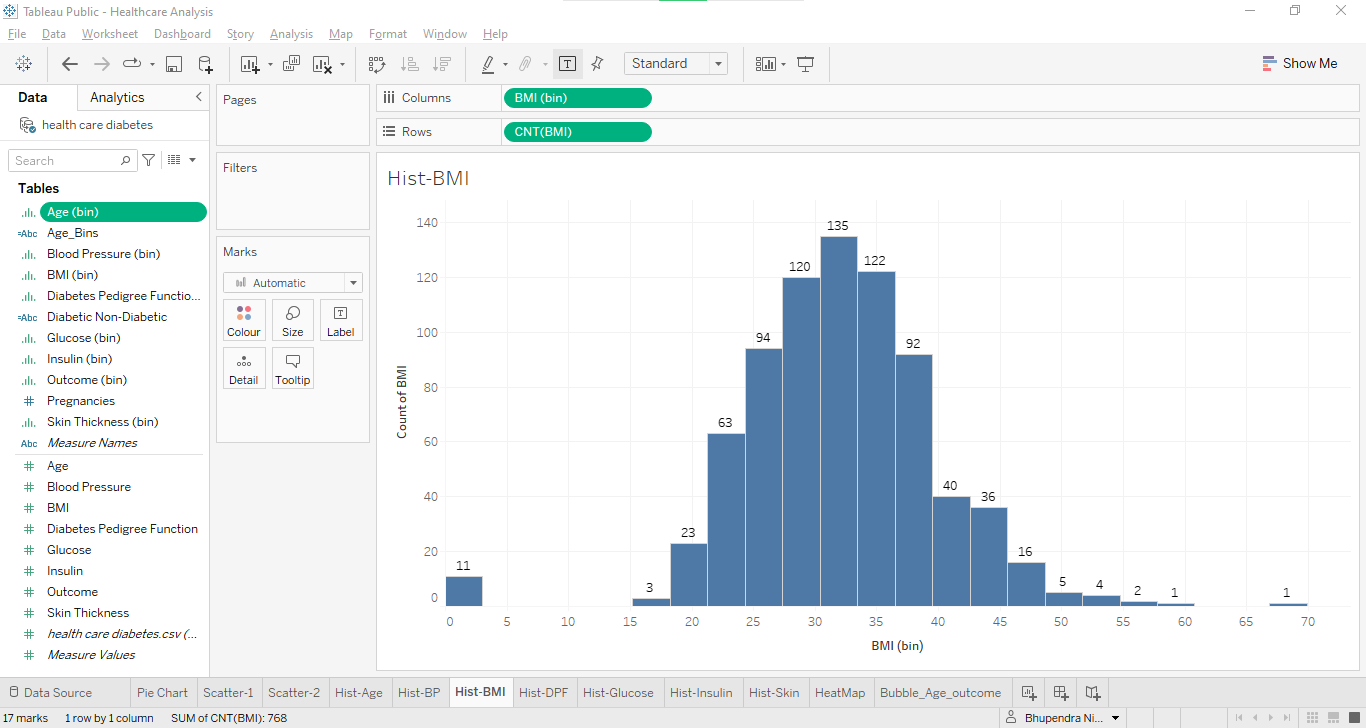

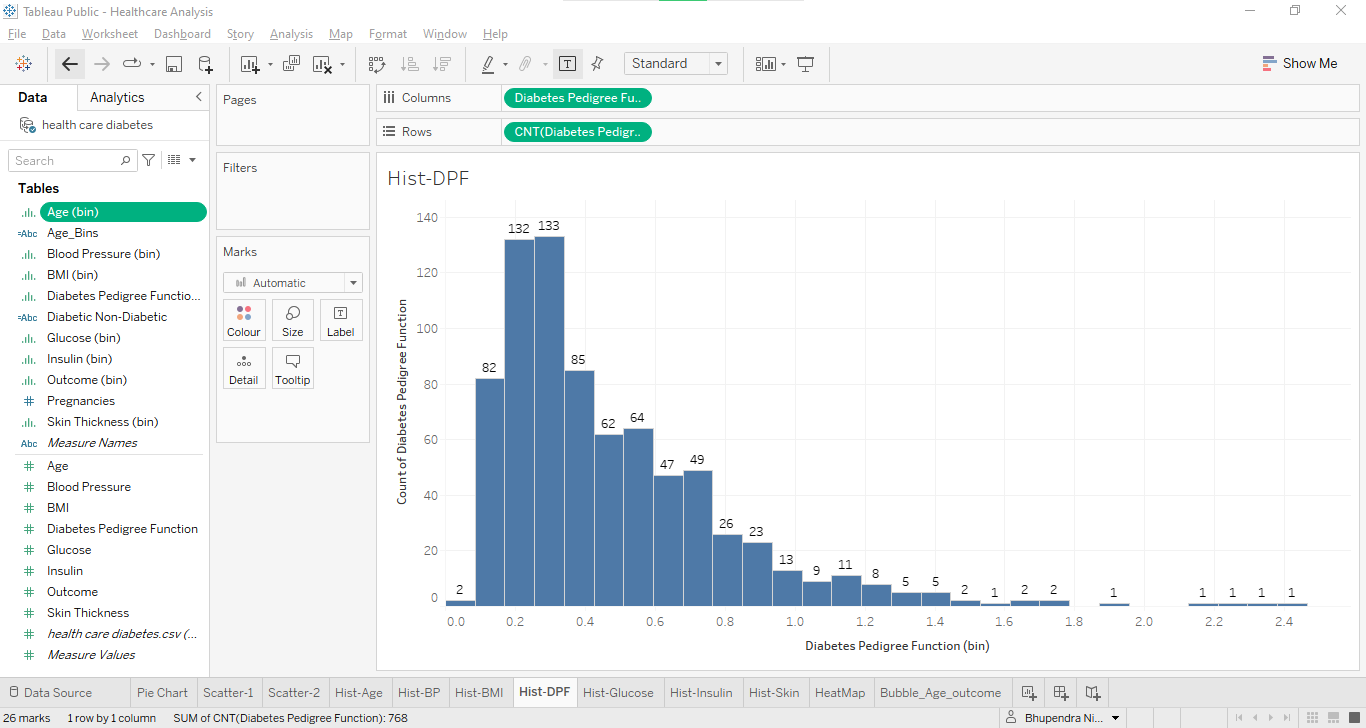

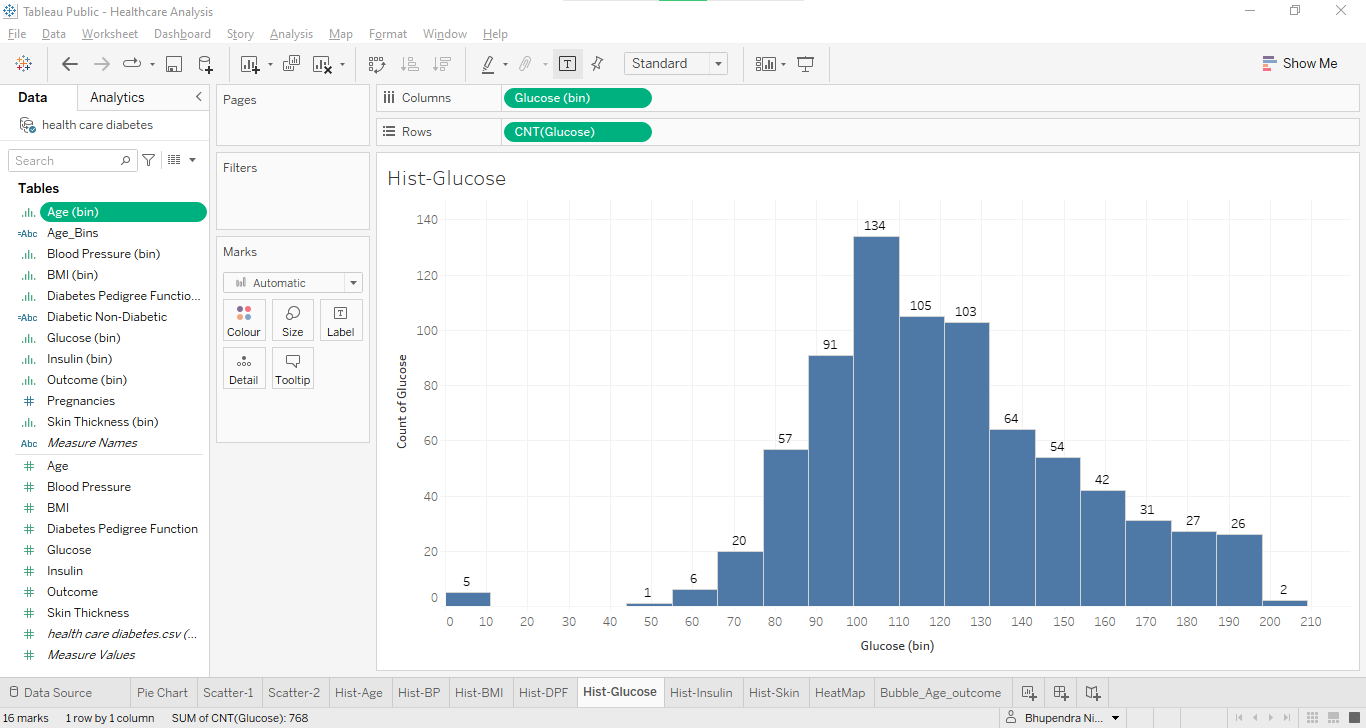

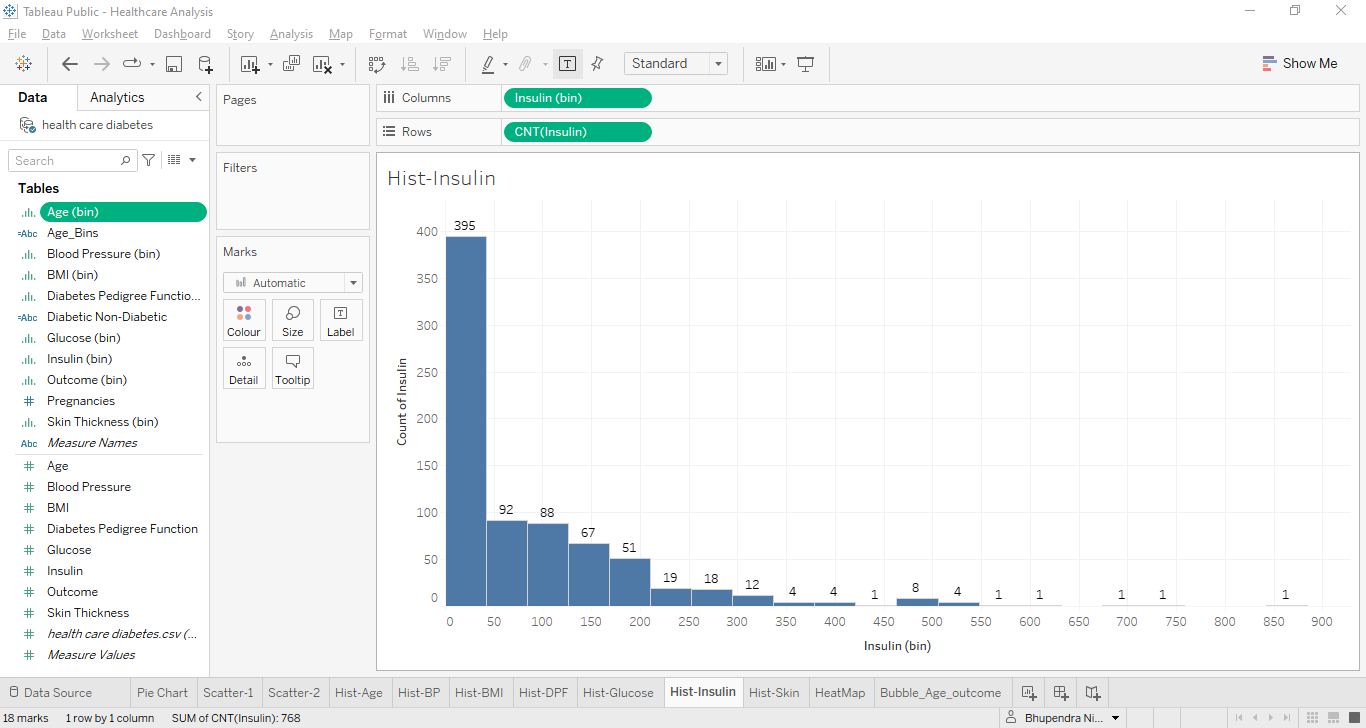

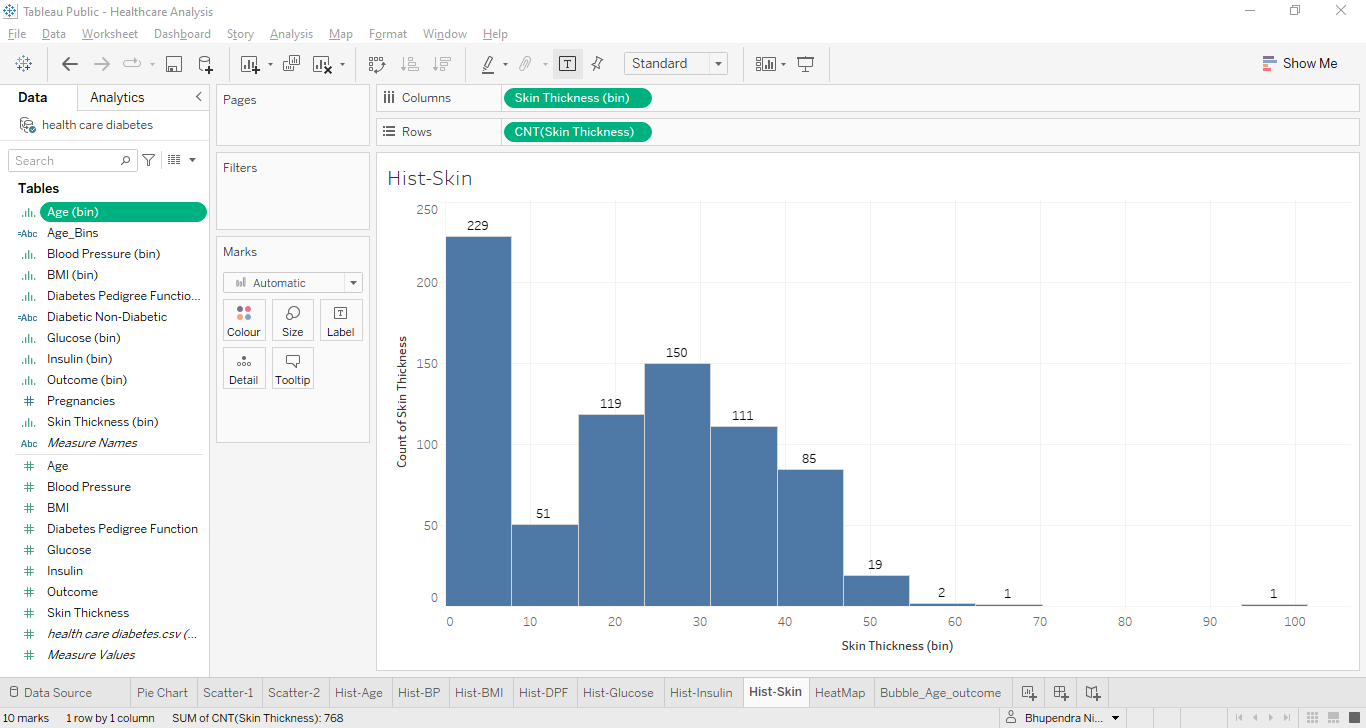

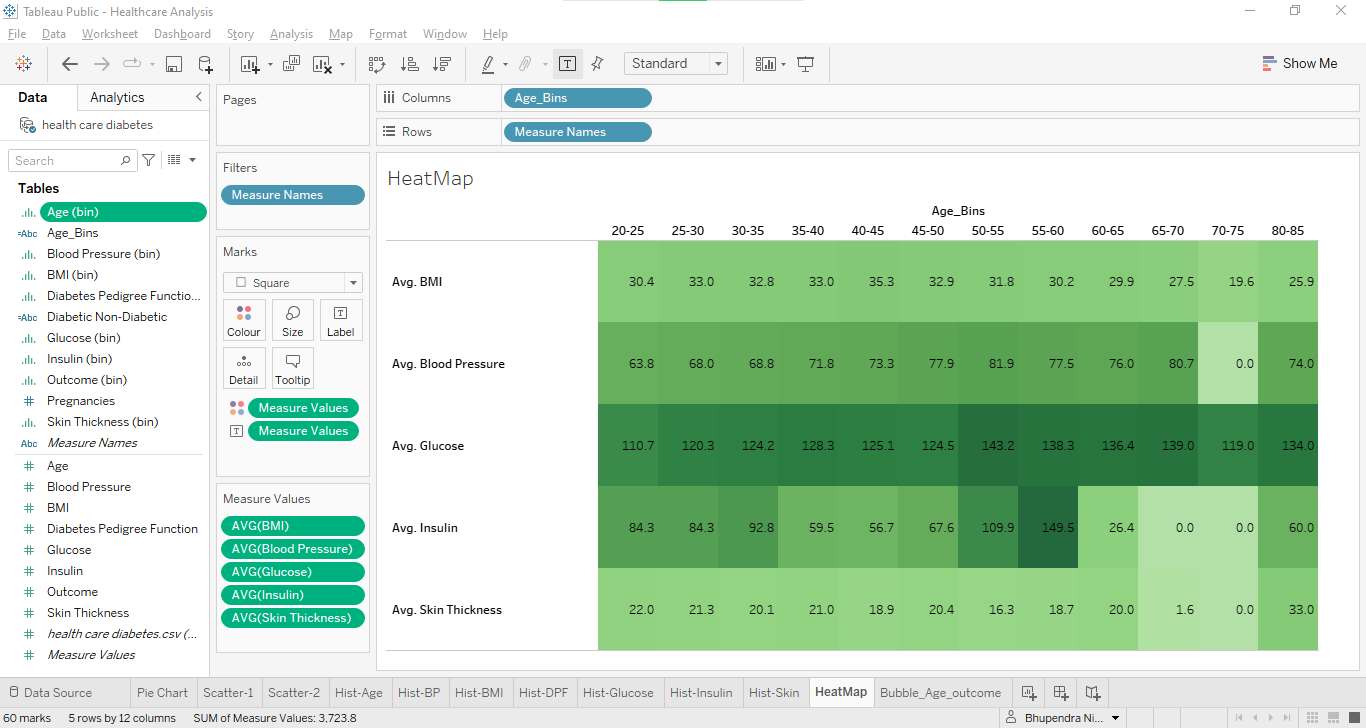

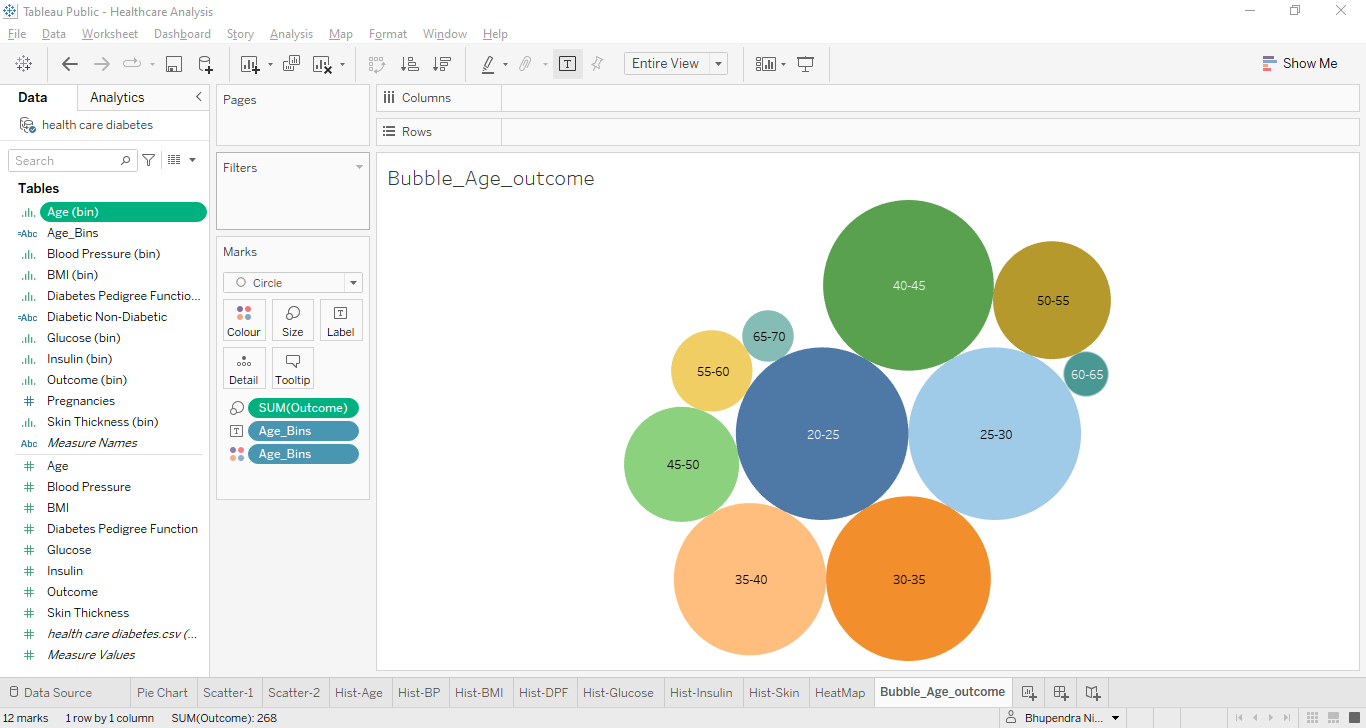